# Questions Classifier

Kelompok B - IF5172 Datawarehouse & Data Mining
- Anindya Prameswari			13518034
- William Fu 				13518055
- Hollyana Puteri Haryono		18218013
- Adriel Gustino P. Situmorang		18218047
- Arief Purnama Muharram		23521013

In [4]:
!pip install --upgrade nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# import necessary package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import seaborn as sns
sns.set_theme(palette='crest') 

## Loading Dataset

In [7]:
df = pd.read_csv('/content/dataset.csv')
print(len(df))
df.head()

607


,label,question
0,500,Bagaimana cara mengobati penyakit Graves?
1,500,Apa obat untuk penyakit Graves?
2,500,Obat apa yang dapat menyembuhkan penyakit Graves?
3,300,Apa gejala terkena penyakit Graves?
4,300,Bagaimana tanda-tanda terkena penyakit Graves?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     607 non-null    int64 
 1   question  607 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.6+ KB


## Data Exploration

### Memeriksa Distribusi Kategori pada Dataset

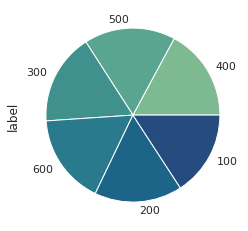

In [9]:
# Summary
df['label'].value_counts().plot(kind='pie')

In [10]:
dfadha = df['label'].value_counts().rename_axis('label').reset_index(name='counts')
dfadha

,label,counts
0,400,104
1,500,103
2,300,103
3,600,102
4,200,99
5,100,96


### Distribusi panjang kalimat pertanyaan

Max: 70 | Min: 2


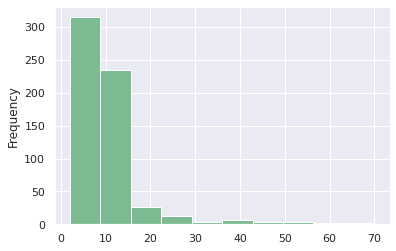

In [11]:
# Check length per question
df['question_length'] = df['question'].str.split().str.len()
print(f"Max: {df['question_length'].max()} | Min: {df['question_length'].min()}")
df['question_length'].plot.hist()

In [12]:
# Check which questions are very long
df.loc[df['question_length'] > 15].head()

,label,question,question_length
118,500,"Dok, saya mau nanya saya sakit penyakit Graves...",19
124,300,"Dok, saya mau nanya. Waktu itu saya ada keluha...",26
125,200,"Dok, ibu saya katanya pernah dibilang sakit Gr...",16
128,400,"Dok, katanya kalau periksa penyakit Graves itu...",16
132,400,Apakah orang yang diduga sakit Graves perlu di...,16


Sepertinya ada data yang diambil dari forum. Karena tipe pertanyaan ini berbeda dengan kebanyakan pertanyaan lainnya (pertanyaan singkat), pertanyaan forum akan dihilangkan.

In [13]:
df_blacklisted = df[(df['question'].str.lower().str.contains("dok | dokter")) & (df['question_length'] > 15)]
print(len(df_blacklisted))
df_blacklisted.head()

26


,label,question,question_length
124,300,"Dok, saya mau nanya. Waktu itu saya ada keluha...",26
154,300,"Selamat pagi, dokter. Saya punya keluhan. Bera...",18
186,600,Dokter saya mau nanya. Mata saya melotot akhir...,28
194,600,"Hai, dokter. Saya mau nanya nih, dok. Kalau pe...",27
200,600,"Dok, nama saya Ani. Saya mau bertanya, dok. Sa...",43


In [14]:
# We will remove all of those above
df = df[~((df['question'].str.lower().str.contains("dok | dokter")) & (df['question_length'] > 15))]
df

,label,question,question_length
0,500,Bagaimana cara mengobati penyakit Graves?,5
1,500,Apa obat untuk penyakit Graves?,5
2,500,Obat apa yang dapat menyembuhkan penyakit Graves?,7
3,300,Apa gejala terkena penyakit Graves?,5
4,300,Bagaimana tanda-tanda terkena penyakit Graves?,5
...,...,...,...
602,200,Mungkinkah penyakit Graves terjadi di usia ana...,7
603,200,Mungkinkah penyakit Graves terjadi di lansia?,6
604,200,Apakah benar merokok memicu timbulnya faktor r...,9
605,200,Kondisi hamil dan stres bisa memicu timbulnya ...,11


Max: 43 | Min: 2


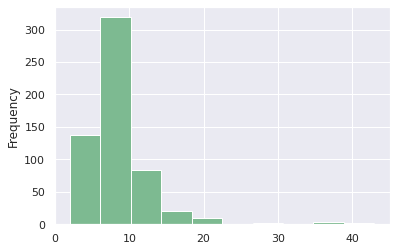

In [15]:
# Check length per question
df['question_length'] = df['question'].str.split().str.len()
print(f"Max: {df['question_length'].max()} | Min: {df['question_length'].min()}")
df['question_length'].plot.hist()

### Menemukan kata yang paling sering muncul pada dataset

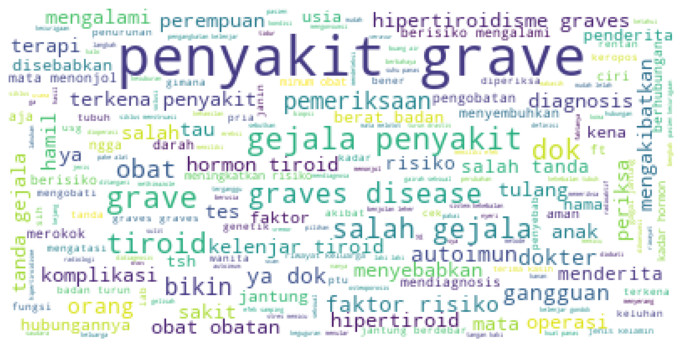

In [16]:
text = df['question'].str.cat(sep=" ")
text = re.sub("[^a-zA-Z -]+", "", text)
text = text.lower()
stops = stopwords.words("indonesian")

wordcloud = WordCloud(background_color="white", stopwords=stops).generate(text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data Preprocessing

### Penanganan duplicated data

In [17]:
# Check for duplicated data
df[df['question'].duplicated(keep=False)]

,label,question,question_length
0,500,Bagaimana cara mengobati penyakit Graves?,5
3,300,Apa gejala terkena penyakit Graves?,5
6,300,Apa gejala terkena penyakit Graves?,5
335,500,Bagaimana cara mengobati penyakit Graves?,5


In [18]:
df = df.drop_duplicates(keep='last')

In [19]:
# read the dictionary of slang-formal words
df_formal_words = pd.read_csv('/content/colloquial-indonesian-lexicon.csv')
slangs_words = df_formal_words[['slang','formal']] 

In [20]:
len(df_formal_words)

15006

In [21]:
def check_slang(row):
  words = row['question'].split(' ')
  for word in words:
    if(len(slangs_words[slangs_words['slang'] == word]) > 0):
      return True
  return False

In [22]:
non_formal_df = df[df.apply(check_slang, axis=1)]
non_formal_df.head()

,label,question,question_length
118,500,"Dok, saya mau nanya saya sakit penyakit Graves...",19
127,400,"Dok, gimana sih caranya diagnosis penyakit Gra...",7
149,500,"Dok, bener ngga ya kalau orang yang sakit Grav...",14
153,300,"Dok, saya sering gampang ngantuk sama ngga tah...",16
193,600,"Dok, saya mau nanya. Kalau penyakit Graves ga ...",15


In [23]:
df['question_clean'] = df['question'].apply(lambda x: re.sub("'", '', x.lower()))

### Tokenization

In [24]:
# DATA CLEANING
# Tokenize
df['question_clean'] = df['question_clean'].apply(nltk.word_tokenize)
print('Tokenization complete.')

df[['question_clean']].head()

Tokenization complete.


,question_clean
1,"[apa, obat, untuk, penyakit, graves, ?]"
2,"[obat, apa, yang, dapat, menyembuhkan, penyaki..."
4,"[bagaimana, tanda-tanda, terkena, penyakit, gr..."
5,"[bagaimana, cara, tahu, kita, mengidap, penyak..."
6,"[apa, gejala, terkena, penyakit, graves, ?]"


### Menghapus stop words dan tanda baca

In [25]:
# Remove stop words
stop_words=set(nltk.corpus.stopwords.words("indonesian"))
stop_words.add('grave')
stop_words.add('graves')
df['question_clean'] = df['question_clean'].apply(lambda x: [item for item in x if item not in stop_words])
print('Stop words removed.')

df[['question_clean']].head()

Stop words removed.


,question_clean
1,"[obat, penyakit, ?]"
2,"[obat, menyembuhkan, penyakit, ?]"
4,"[tanda-tanda, terkena, penyakit, ?]"
5,"[mengidap, penyakit, ?]"
6,"[gejala, terkena, penyakit, ?]"


In [26]:
# Remove numbers, punctuation and special characters (only keep words)
regex = '[a-z]+'
df['question_clean'] = df['question_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])
print('Numbers, punctuation and special characters removed.')

df[['question_clean']].head()

Numbers, punctuation and special characters removed.


,question_clean
1,"[obat, penyakit]"
2,"[obat, menyembuhkan, penyakit]"
4,"[tanda-tanda, terkena, penyakit]"
5,"[mengidap, penyakit]"
6,"[gejala, terkena, penyakit]"


### Melakukan stemmatization

In [27]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df['question_clean'] = df['question_clean'].apply(lambda x: ' '.join(x))

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming process
df['question_clean'] = df['question_clean'].apply(lambda x: stemmer.stem(x))
df.head()

,label,question,question_length,question_clean
1,500,Apa obat untuk penyakit Graves?,5,obat sakit
2,500,Obat apa yang dapat menyembuhkan penyakit Graves?,7,obat sembuh sakit
4,300,Bagaimana tanda-tanda terkena penyakit Graves?,5,tanda kena sakit
5,300,Bagaimana cara tahu kita mengidap penyakit Gra...,7,idap sakit
6,300,Apa gejala terkena penyakit Graves?,5,gejala kena sakit


In [28]:
df_prep = df.copy()
df_prep = df_prep.drop(columns=['question'])
df_prep.head()

,label,question_length,question_clean
1,500,5,obat sakit
2,500,7,obat sembuh sakit
4,300,5,tanda kena sakit
5,300,7,idap sakit
6,300,5,gejala kena sakit


## Modelling

### Train/Test Split
Dalam eksperimen ini, dilakukan splitting 80:20 untuk dataset training dan test.

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

df_attr = np.array(df_prep['question_clean'])
df_label = np.array(df_prep['label'])

X_train, X_test, y_train, y_test = train_test_split(
    df_attr, df_label, test_size=0.2,
    random_state=42, stratify=df_label
)

print(f"Train dataset: {X_train.shape}")
print(f"Test dataset: {X_test.shape}")

Train dataset: (463,)
Test dataset: (116,)


In [30]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    df_prep['question_clean'], df_prep['label'], test_size=0.2,
    random_state=42, stratify=df_prep['label']
)

### Pipeline Model with TF-IDF Vectorizer
Dalam eksperimen ini, dimanfaatkan vectorizer TF-IDF untuk mentransformasi teks menjadi vector. Vectorizer ini memiliki tambahan komponen TFIDF di atas CountVectorizer. Adapun metrik pengukuran yang dimanfaatkan dalam vectorizer ini adalah sebagai berikut.

TF(t,d) + IDF(t)

Keterangan:
- *TF(t,d)*: Term Frequency, banyaknya kemunculan term t dalam dokumen d
- *IDF(t)*: Inverse Document Frequency, ukuran yang menentukan seberapa sering sebuah term t muncul dalam corpus dokumen yang ada

In [31]:
# Classification using TFIDF vectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import xgboost as xgb

models = {
    'Naive Bayes': MultinomialNB(), 
    'Decision Tree': DecisionTreeClassifier(),  
    'Perceptron': MLPClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Random Forest': ExtraTreesClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': xgb.XGBClassifier()
}

params = {
    'Naive Bayes': { 'alpha': [0.5, 0.75, 1], 'fit_prior': [True, False] }, 
    'Decision Tree': { 'min_samples_split': [1, 2, 5] }, 
    'Perceptron': { 'alpha': [0.0001, 0.001], 'activation': ['tanh', 'relu'] },
    'Gradient Boosting': { 'learning_rate': [0.05, 0.1], 'min_samples_split': [2, 5] },
    'Random Forest': { 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'n_estimators': range(100, 1000, 100)},
    'Extra Random Forest': { 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': range(100, 1000, 100) },
    'SGD Classifier': { 'loss': ['log', 'hinge', 'squared_error'], 'penalty': ['l1','l2']  },
    'Logistic Regression': { 'penalty': ['l1','l2'], 'C': np.logspace(-3,3,7), 'solver' : ['newton-cg', 'lbfgs', 'liblinear']},
    'XGBoost': { "max_depth": [3, 4, 5], "learning_rate": [0.1, 0.01, 0.05], "gamma": [0, 0.1, 0.25, 1], "reg_lambda": [0, 1] }
}

class Classifier(object):
    
    def __init__(self, model, param):
        self.model = model
        self.param = param
        self.gs = GridSearchCV(self.model, self.param, cv=10, scoring = 'accuracy', refit=True)        

    def fit(self, X, y):        
        res = self.gs.fit(X, y)
        print(self.gs.best_params_)
        return 

    def predict(self, X):
        return self.gs.predict(X)

    def predict_proba(self, X):
        return self.gs.predict(X)

clf_pipelines = []
for key in models.keys():
  print(key)
  clf = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', Classifier(models[key], params[key])),
                ])
  clf.fit(X_train, y_train)
  y_pred = clf.predict_proba(X_test)
  print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))
  clf_pipelines.append(clf)

# for clf in clf_pipelines:
  # y_pred = clf.predict_proba(preprocess_test)
  # print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))

Naive Bayes
{'alpha': 0.5, 'fit_prior': False}
Accuracy: 0.905 	Precision: 0.913 	Recall: 0.907 		F1: 0.906

Decision Tree
{'min_samples_split': 2}
Accuracy: 0.828 	Precision: 0.840 	Recall: 0.829 		F1: 0.829

Perceptron
{'activation': 'tanh', 'alpha': 0.001}
Accuracy: 0.879 	Precision: 0.885 	Recall: 0.881 		F1: 0.878

Gradient Boosting
{'learning_rate': 0.05, 'min_samples_split': 2}
Accuracy: 0.862 	Precision: 0.896 	Recall: 0.864 		F1: 0.867

Random Forest
{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 400}
Accuracy: 0.897 	Precision: 0.912 	Recall: 0.898 		F1: 0.899

Extra Random Forest
{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 800}
Accuracy: 0.914 	Precision: 0.925 	Recall: 0.915 		F1: 0.914

SGD Classifier
{'loss': 'log', 'penalty': 'l2'}
Accuracy: 0.888 	Precision: 0.894 	Recall: 0.889 		F1: 0.887

Logistic Regression
{'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.871 	Precision: 0.878 	Recall: 0.872 		F1: 0.869

XGBoost
{'

Melalui hasil eksperimen di atas, model *shallow learning* yang dipilih merupakan **Naive Bayes** (MultinomialNB) untuk melakukan klasifikasi. Pipeline model berikut dipersiapkan untuk kebutuhan deployment model.

In [32]:
# Naive Bayes Model Training
clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=0.75, fit_prior=False))
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.905 	Precision: 0.913 	Recall: 0.907 		F1: 0.906



In [46]:
# Model Terpilih: Naive Bayes
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_new = label_binarize(y_test, classes=[100,200,300,400,500,600])
y_train_new = label_binarize(y_train, classes=[100,200,300,400,500,600])

nb_clf = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', OneVsRestClassifier(MultinomialNB(alpha=0.75, fit_prior=False)))])
nb_clf.fit(X_train, y_train_new)
y_pred_nb = nb_clf.predict(X_test)

In [47]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(df_label))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_new[:, i], y_pred_nb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

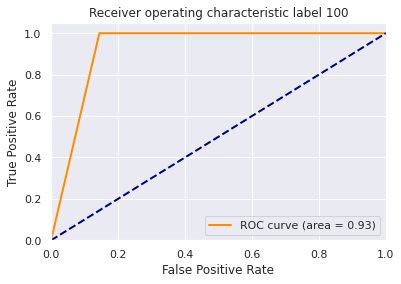

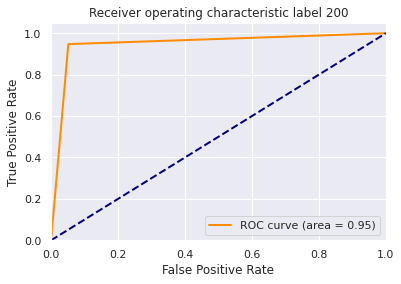

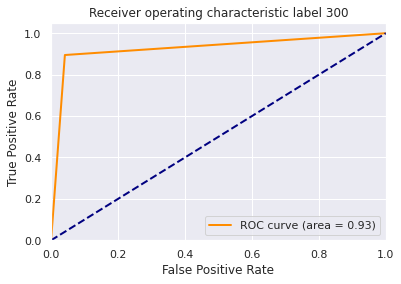

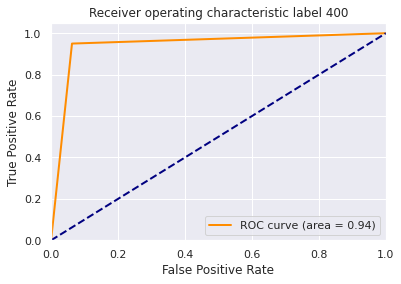

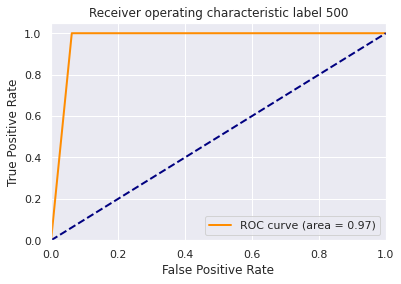

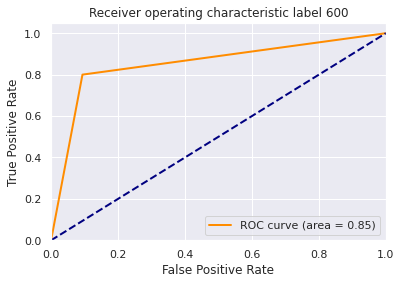

In [59]:
for i in range(6):
  plt.plot(
      fpr[i],
      tpr[i],
      color="darkorange",
      lw=2,
      label="ROC curve (area = %0.2f)" % roc_auc[i],
  )
  plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"Receiver operating characteristic label {(i+1)*100}")
  plt.legend(loc="lower right")
  plt.show()

## Exporting Model

In [36]:
# Exporting the model
import joblib

joblib.dump(clf, 'joblib-latest-multinom-nb.pkl')

['joblib-latest-multinom-nb.pkl']